In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms

import numpy as np
import random
np.random.seed(0)
torch.manual_seed(0)
random.seed(0)


# Data

In [2]:

transform = transforms.ToTensor()

training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

training_loader = torch.utils.data.DataLoader(training_set, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 199kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.67MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


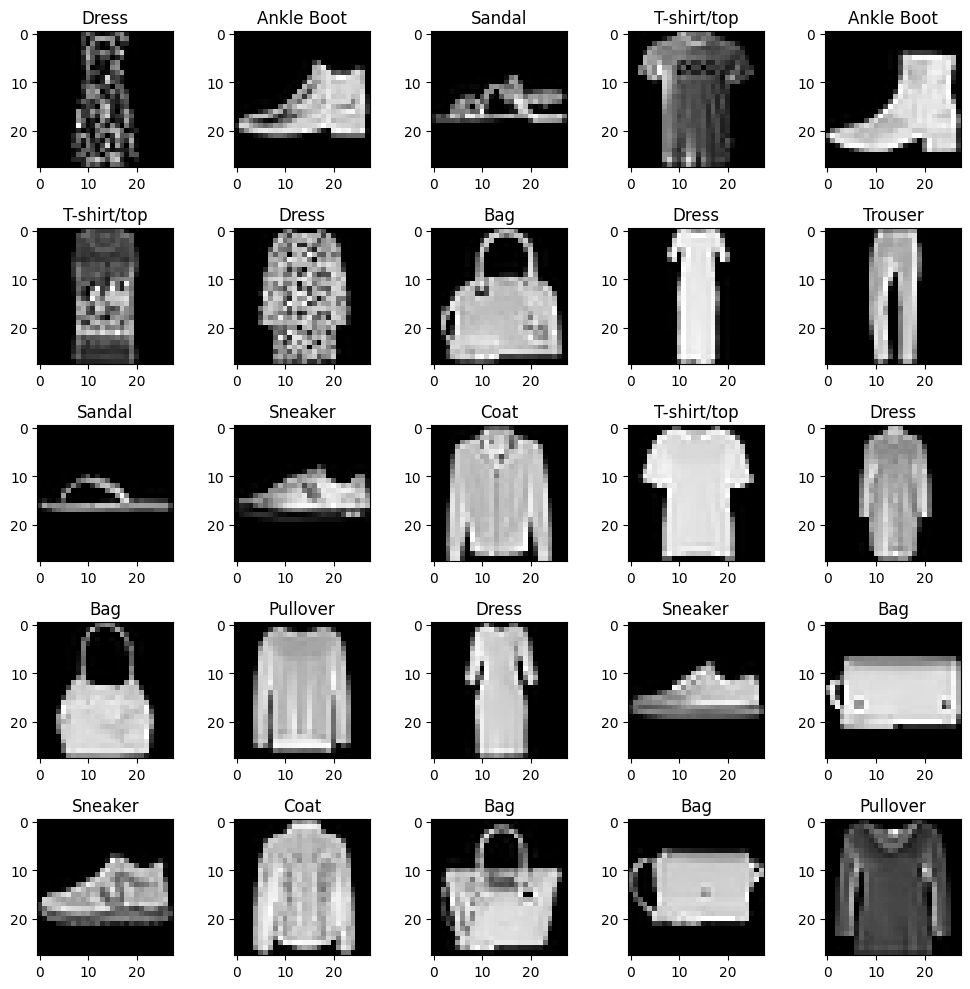

In [3]:
batch = next(iter(training_loader))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(*batch)):
    if i > 24:
        break
    plt.subplot(5, 5, i + 1)
    plt.imshow(image[0], cmap="gray")
    plt.title(classes[label])

plt.tight_layout()

# Exercise

You are required to train an MLP on the Fashion MNIST dataset. For this task, you must define the following:

* The objective function
* The model architecture
* The optimizer
* The training loop

You will train three MLP models, each with different hyperparameters. You must vary at least two of the following aspects between the models:

* Number of layers
* Number of neurons
* Activation function
* Optimizer


## Deliverables
* The complete code
* Learning curves for the three MLP models
* Table summarizing the changes in the hyperparameters and the performance of the models on the train and test sets.
* A write-up analyzing how your choices impacted the results.

In [10]:
def train_one_epoch(model, optimizer, train_loader, criterion):
    model.train()
    losses = []

    for images, labels in train_loader:

        optimizer.zero_grad()
        y_pred = model(images)
        loss = criterion(y_pred, labels)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return losses

In [38]:
def validate_one_epoch(model, val_loader, criterion):
    model.eval()
    losses = []

    with torch.no_grad():
        for images, labels in val_loader:
            y_pred = model(images)
            loss = criterion(y_pred, labels)
            losses.append(loss.item())

    return losses

In [9]:
class Model_1(nn.Module):
    def __init__(self , input_shape , output_shape):
        super(Model_1, self).__init__()

        self.fc1 = nn.Linear(input_shape , 256)
        self.fc2 = nn.Linear(256 , 128)
        self.fc3 = nn.Linear(128 , 64)
        self.out = nn.Linear(64 , output_shape)

        self.relu = nn.ReLU()

    def forward(self ,x):
          x = x.view(-1, 28*28)
          x = self.relu(self.fc1(x))
          x = self.relu(self.fc2(x))
          x = self.relu(self.fc3(x))
          x = self.out(x)
          return x

In [6]:
criterion = nn.CrossEntropyLoss()

In [54]:
model = Model_1(28*28 , 10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [55]:
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    losses = train_one_epoch(model, optimizer, training_loader, criterion)
    avg_train_loss = np.mean(losses)
    train_losses.append(avg_train_loss)

    val_loss = validate_one_epoch(model, validation_loader, criterion)
    avg_val_loss = np.mean(val_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Epoch 1/10, Train Loss: 0.5283, Val Loss: 0.4495
Epoch 2/10, Train Loss: 0.3734, Val Loss: 0.3783
Epoch 3/10, Train Loss: 0.3365, Val Loss: 0.3778
Epoch 4/10, Train Loss: 0.3124, Val Loss: 0.3694
Epoch 5/10, Train Loss: 0.2934, Val Loss: 0.3569
Epoch 6/10, Train Loss: 0.2774, Val Loss: 0.3345
Epoch 7/10, Train Loss: 0.2636, Val Loss: 0.3639
Epoch 8/10, Train Loss: 0.2521, Val Loss: 0.3321
Epoch 9/10, Train Loss: 0.2422, Val Loss: 0.3489
Epoch 10/10, Train Loss: 0.2350, Val Loss: 0.3270


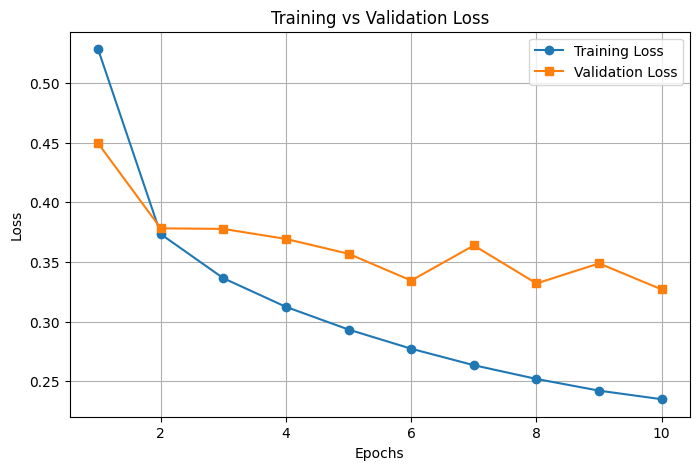

In [56]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, label="Training Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="s")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [15]:
class Model_2(nn.Module):
    def __init__(self , input_shape , output_shape):
        super(Model_2, self).__init__()

        self.fc1 = nn.Linear(input_shape , 128)
        self.fc2 = nn.Linear(128 , 64)
        self.out = nn.Linear(64 , output_shape)

        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()

    def forward(self ,x):
          x = x.view(-1, 28*28)
          x = self.tanh(self.fc1(x))
          x = self.relu(self.fc2(x))
          x = self.out(x)
          return x

In [61]:
model = Model_2(28*28 , 10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [62]:
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    losses = train_one_epoch(model, optimizer, training_loader, criterion)
    avg_train_loss = np.mean(losses)
    train_losses.append(avg_train_loss)

    val_loss = validate_one_epoch(model, validation_loader, criterion)
    avg_val_loss = np.mean(val_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Epoch 1/10, Train Loss: 2.1211, Val Loss: 1.8950
Epoch 2/10, Train Loss: 1.6245, Val Loss: 1.3966
Epoch 3/10, Train Loss: 1.2417, Val Loss: 1.1308
Epoch 4/10, Train Loss: 1.0430, Val Loss: 0.9860
Epoch 5/10, Train Loss: 0.9248, Val Loss: 0.8918
Epoch 6/10, Train Loss: 0.8431, Val Loss: 0.8233
Epoch 7/10, Train Loss: 0.7818, Val Loss: 0.7699
Epoch 8/10, Train Loss: 0.7337, Val Loss: 0.7279
Epoch 9/10, Train Loss: 0.6948, Val Loss: 0.6938
Epoch 10/10, Train Loss: 0.6623, Val Loss: 0.6645


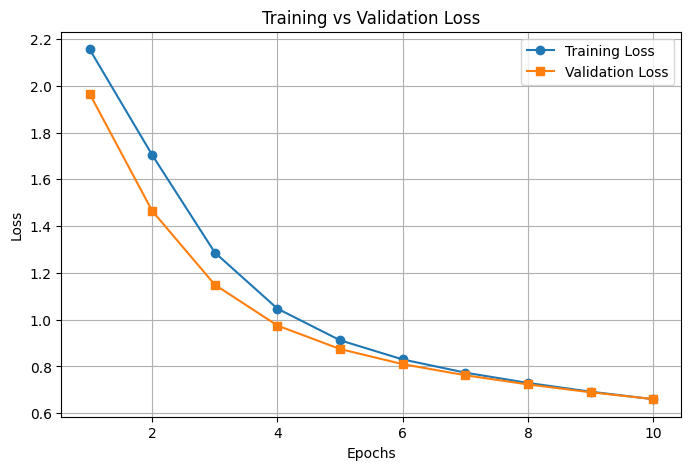

In [53]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, label="Training Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="s")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [47]:
class Model_3(nn.Module):
    def __init__(self , input_shape , output_shape):
        super(Model_3, self).__init__()

        self.fc1 = nn.Linear(input_shape , 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512 , 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256 , 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128 , 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.out = nn.Linear(64 , output_shape)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self ,x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.relu(self.bn4(self.fc4(x)))
        x = self.out(x)
        return x

In [64]:
model = Model_3(28*28 , 10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [65]:
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    losses = train_one_epoch(model, optimizer, training_loader, criterion)
    avg_train_loss = np.mean(losses)
    train_losses.append(avg_train_loss)

    val_loss = validate_one_epoch(model, validation_loader, criterion)
    avg_val_loss = np.mean(val_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Epoch 1/10, Train Loss: 0.5971, Val Loss: 0.4329
Epoch 2/10, Train Loss: 0.4461, Val Loss: 0.3798
Epoch 3/10, Train Loss: 0.4077, Val Loss: 0.3618
Epoch 4/10, Train Loss: 0.3812, Val Loss: 0.3488
Epoch 5/10, Train Loss: 0.3618, Val Loss: 0.3384
Epoch 6/10, Train Loss: 0.3488, Val Loss: 0.3211
Epoch 7/10, Train Loss: 0.3306, Val Loss: 0.3152
Epoch 8/10, Train Loss: 0.3222, Val Loss: 0.3079
Epoch 9/10, Train Loss: 0.3142, Val Loss: 0.3115
Epoch 10/10, Train Loss: 0.3048, Val Loss: 0.3139


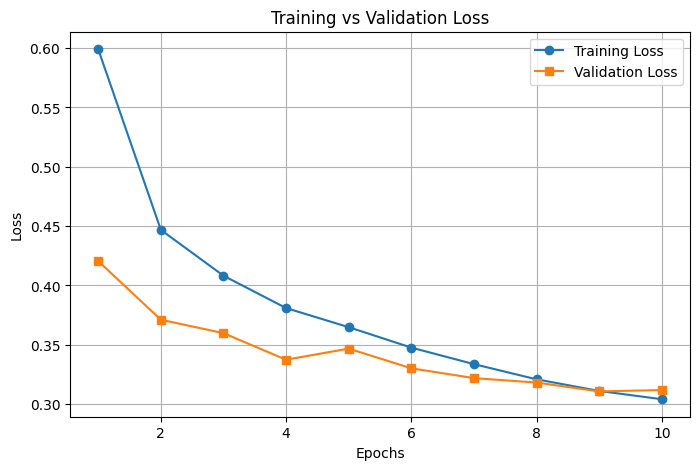

In [50]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, label="Training Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="s")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [60]:
data = {
    'train_error' : train_losses,
    'val_error' : val_losses,
    'epochs' : epochs,
    'optimizer' : 'Adam',
    'activation' : 'ReLU'
}
df1 = pd.DataFrame(data)
df1.head()

,train_error,val_error,epochs,optimizer,activation
0,0.528345,0.449530,1,Adam,ReLU
1,0.373418,0.378258,2,Adam,ReLU
2,0.336452,0.377770,3,Adam,ReLU
3,0.312444,0.369375,4,Adam,ReLU
4,0.293430,0.356918,5,Adam,ReLU


In [63]:
data = {
    'train_error' : train_losses,
    'val_error' : val_losses,
    'epochs' : epochs,
    'optimizer' : 'SGD',
    'activation' : 'ReLU and Tanh',
    'no_of_layers' : '2 hidden layers',
}

df1 = pd.DataFrame(data)
df1.head()

,train_error,val_error,epochs,optimizer,activation,no_of_layers
0,2.121096,1.894957,1,SGD,ReLU and Tanh,2 hidden layers
1,1.624537,1.396562,2,SGD,ReLU and Tanh,2 hidden layers
2,1.241726,1.130807,3,SGD,ReLU and Tanh,2 hidden layers
3,1.043015,0.985986,4,SGD,ReLU and Tanh,2 hidden layers
4,0.924847,0.891836,5,SGD,ReLU and Tanh,2 hidden layers


In [66]:
data = {
    'train_error' : train_losses,
    'val_error' : val_losses,
    'epochs' : epochs,
    'optimizer' : 'Adam',
    'activation' : 'ReLU',
    'no_of_layers' : '4 hidden layers',
}

df2 = pd.DataFrame(data)
df2.head()

,train_error,val_error,epochs,optimizer,activation,no_of_layers
0,0.597083,0.432890,1,Adam,ReLU,4 hidden layers
1,0.446076,0.379817,2,Adam,ReLU,4 hidden layers
2,0.407684,0.361772,3,Adam,ReLU,4 hidden layers
3,0.381220,0.348839,4,Adam,ReLU,4 hidden layers
4,0.361802,0.338438,5,Adam,ReLU,4 hidden layers
